# Import library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Import Dataset 

In [2]:
# import data
data = pd.read_csv("data_dummy.csv")
data.head()

,No,NIM,nama_mahasiswa,UTS,UAS,tugasonline,quizonline,NA,nilai_akhir,grade,ket
0,1,20170801075,Windu Fajar Sukmawan,0.0,4.0,42.5,77.14,30.91,0.0,E,TL
1,2,20180801248,Dimas Mulia Hafiz,20.0,5.0,60.9,41.43,31.83,0.0,E,TL
2,3,20180801422,Abdur Rohman,20.0,0.0,30.4,62.86,28.32,0.0,E,TL
3,4,20180801467,Nadia,80.0,85.0,70.8,100.00,83.95,4.0,A,L
4,5,20180801475,Siti Ambarwati,80.0,85.0,76.2,92.86,83.52,4.0,A,L


# Data Exploration

In [3]:
# menggunakan df sebagai data split dari data
df = data[['UTS', 'tugasonline', 'quizonline','ket']]
df

,UTS,tugasonline,quizonline,ket
0,0.0,42.5,77.14,TL
1,20.0,60.9,41.43,TL
2,20.0,30.4,62.86,TL
3,80.0,70.8,100.00,L
4,80.0,76.2,92.86,L
...,...,...,...,...
115,75.1,74.0,70.00,L
116,76.7,85.0,80.00,L
117,77.1,74.0,70.00,L
118,58.0,76.0,75.00,L


In [4]:
# mengganti labeling dengan label encoder 
# 1 untuk tidak lulus
# 0 untuk lulus
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['ket'] = enc.fit_transform(df['ket'].values)
df

C:\Users\Caren\AppData\Local\Temp\ipykernel_15392\2846058792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ket'] = enc.fit_transform(df['ket'].values)


,UTS,tugasonline,quizonline,ket
0,0.0,42.5,77.14,1
1,20.0,60.9,41.43,1
2,20.0,30.4,62.86,1
3,80.0,70.8,100.00,0
4,80.0,76.2,92.86,0
...,...,...,...,...
115,75.1,74.0,70.00,0
116,76.7,85.0,80.00,0
117,77.1,74.0,70.00,0
118,58.0,76.0,75.00,0


In [5]:
# cek data yang mempunyai missing value
df.isna().sum()

UTS            1
tugasonline    2
quizonline     1
ket            0
dtype: int64

In [6]:
# menghapus missing value 
df.dropna(inplace=True)
df.isna().sum()

C:\Users\Caren\AppData\Local\Temp\ipykernel_15392\2849400978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


UTS            0
tugasonline    0
quizonline     0
ket            0
dtype: int64

In [7]:
# cek data 
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UTS          118 non-null    float64
 1   tugasonline  118 non-null    float64
 2   quizonline   118 non-null    float64
 3   ket          118 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 4.1 KB


UTS            118
tugasonline    118
quizonline     118
ket            118
dtype: int64

In [8]:
# menampilkan statistik deskriptif dari dataset yang dimiliki
df.describe()

,UTS,tugasonline,quizonline,ket
count,118.000000,118.000000,118.000000,118.000000
mean,55.658475,60.658475,69.266525,0.355932
std,27.590063,24.553703,25.345255,0.480837
min,0.000000,0.000000,0.000000,0.000000
25%,39.910000,49.150000,62.860000,0.000000
50%,64.690000,70.000000,75.000000,0.000000
75%,78.500000,76.000000,85.000000,1.000000
max,90.000000,95.000000,100.000000,1.000000


# Visualisasi Data 

In [9]:
# Menghitung jumlah orang yang tidak lulus
jumlah_tidak_lulus = df['ket'].value_counts()[1]
print("Jumlah orang yang tidak lulus:", jumlah_tidak_lulus)

# Menghitung jumlah orang yang lulus
jumlah_lulus = df['ket'].value_counts()[0]
print("Jumlah orang yang lulus:", jumlah_lulus)

Jumlah orang yang tidak lulus: 42
Jumlah orang yang lulus: 76


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ket', ylabel='count'>

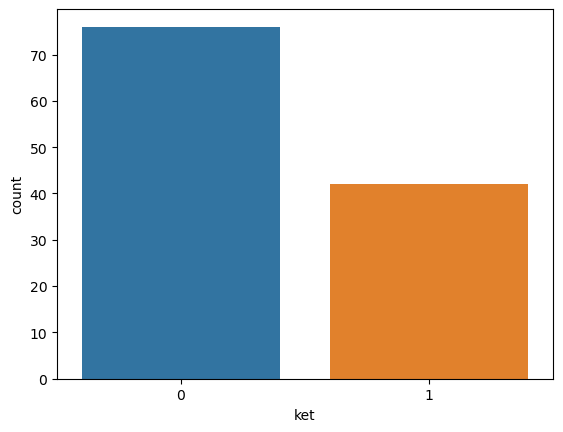

In [10]:
sns.countplot(df.ket)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

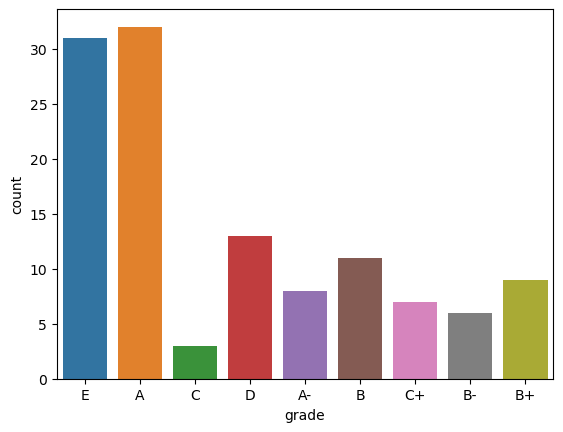

In [11]:
sns.countplot(data.grade)

# Modelling

In [12]:
# Memisahkan atribut dan label
X = df.drop(['ket'], axis=1)
y = df['ket']

In [13]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# Membangun model C4.5 (Decision Tree)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# Memprediksi data uji
y_pred = model.predict(X_test)

# Evaluation 

Confusion Matrix:
[[15  1]
 [ 2  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.86      0.75      0.80         8

    accuracy                           0.88        24
   macro avg       0.87      0.84      0.85        24
weighted avg       0.87      0.88      0.87        24



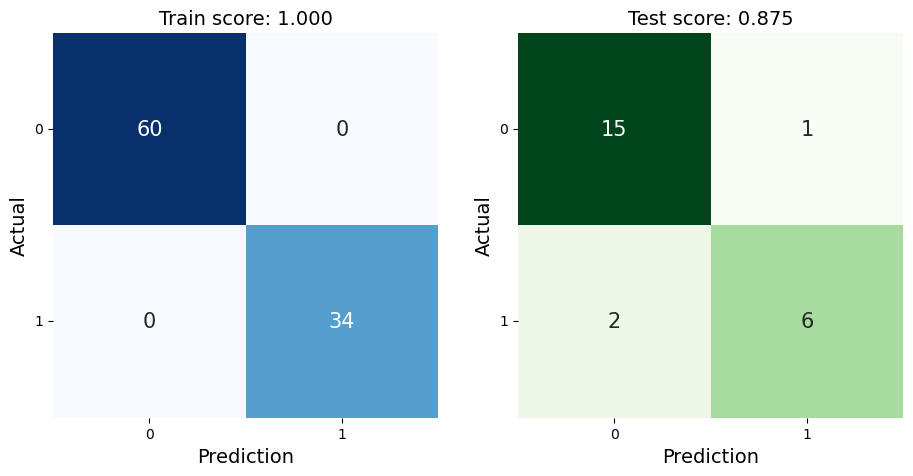

In [16]:
# Menampilkan confusion matrix dan classification report
from jcopml.plot import plot_confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [17]:
accuracy_train = model.score(X_train, y_train)
accuracy_test  = model.score(X_test, y_test) 

In [18]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 100.0 %
Akurasi Model (Test)  : 87.5 %


## Pengaruh terbesar dalam kelulusan 

In [19]:
# Mendapatkan pentingnya fitur
feature_importances = model.feature_importances_

In [20]:
# Menampilkan atribut yang paling berpengaruh
for feature, importance in zip(X.columns, feature_importances):
    print(feature, importance)

UTS 0.4976786872026633
tugasonline 0.2845711947889441
quizonline 0.21775011800839264


## Rules  

|--- UTS <= 56.75
|   |--- tugasonline <= 52.90
|   |   |--- class: 1
|   |--- tugasonline >  52.90
|   |   |--- quizonline <= 52.85
|   |   |   |--- class: 1
|   |   |--- quizonline >  52.85
|   |   |   |--- quizonline <= 84.65
|   |   |   |   |--- tugasonline <= 73.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- tugasonline >  73.40
|   |   |   |   |   |--- quizonline <= 65.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- quizonline >  65.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- quizonline >  84.65
|   |   |   |   |--- quizonline <= 99.28
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- quizonline >  99.28
|   |   |   |   |   |--- class: 0
|--- UTS >  56.75
|   |--- tugasonline <= 44.00
|   |   |--- class: 1
|   |--- tugasonline >  44.00
|   |   |--- quizonline <= 72.50
|   |   |   |--- UTS <= 81.10
|   |   |   |   |--- UTS <= 65.35
|   |   |   |   |   |--- UTS <= 63.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- UT

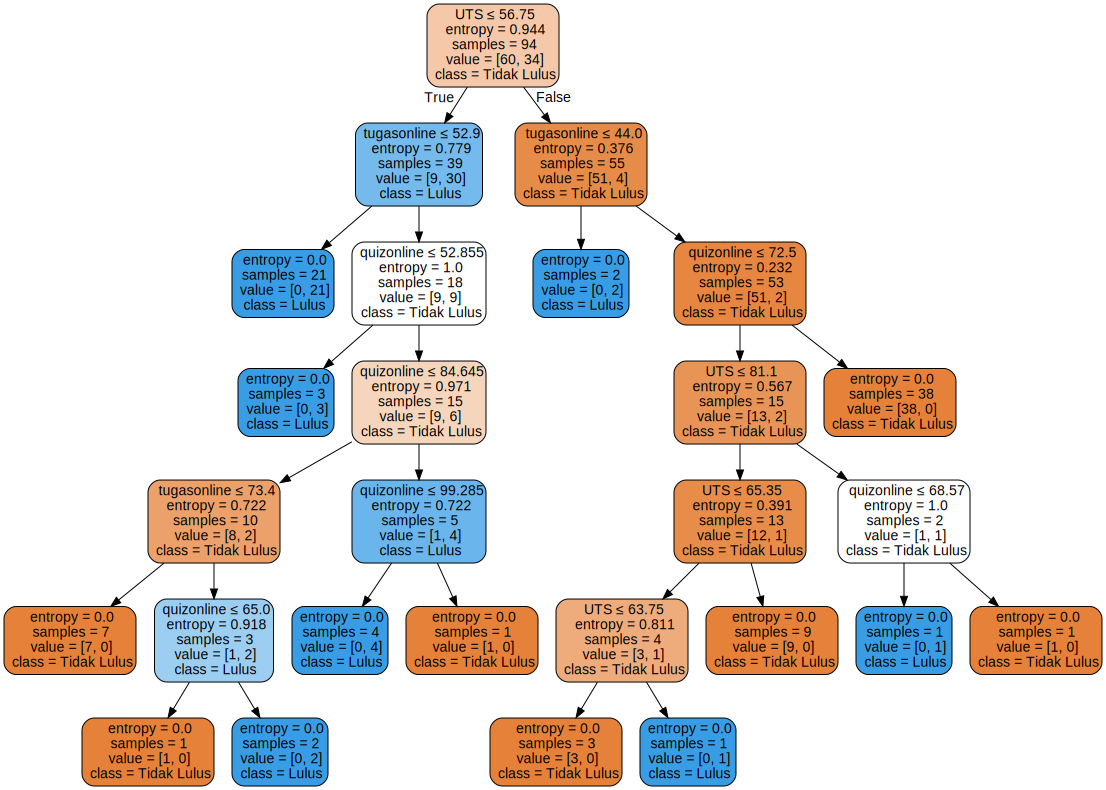

In [21]:
from sklearn.tree import export_text
import graphviz
from sklearn import tree

rules = export_text(model, feature_names=X.columns.tolist())
print(rules)

# Cetak gambar aturan model
df = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Tidak Lulus', 'Lulus'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(df)
graph.render('model_c50')  # Simpan gambar sebagai file "model_c50.png"
graph

In [22]:
joblib.dump((model), "Graduation_Prediction.model")

['Graduation_Prediction.model']

In [40]:
UTS = 0
tugasonline = 90 
quizonline = 70

Data_Testing = [[UTS, tugasonline, quizonline]]

In [41]:
y_pred = model.predict(Data_Testing)

C:\Users\Caren\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
if y_pred == 0:
    hasil = "Lulus"
elif y_pred == 1:
    hasil = "Tidak Lulus"
else: hasil = "Error"
    
print("Hasil Prediksi Kelulusan Mahasiswa : ", hasil)

Hasil Prediksi Kelulusan Mahasiswa :  Tidak Lulus


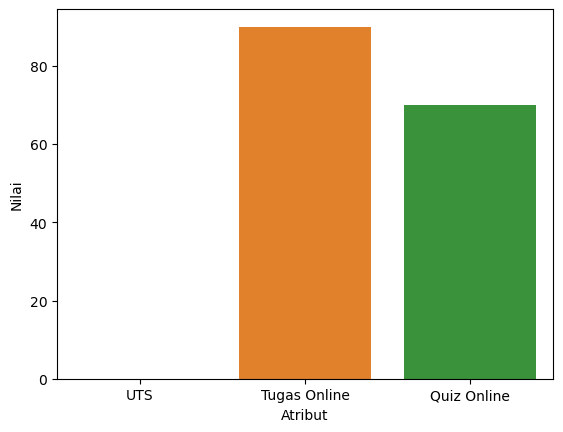

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat list nama tugas dan nilai
assignments = ['UTS', 'Tugas Online', 'Quiz Online']
scores = [UTS, tugasonline, quizonline]

# Membuat plot menggunakan seaborn
sns.barplot(x=assignments, y=scores)

# Memberikan label pada sumbu x
plt.xlabel('Atribut')

# Memberikan label pada sumbu y
plt.ylabel('Nilai')

# Menampilkan plot
plt.show()


In [47]:
import pickle

# Make pickle file of our model
pickle.dump(model, open("model_2.pkl", "wb"))